In [1]:
from pynq import Overlay,allocate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ol = Overlay("design_1.bit")

In [3]:
ol.ip_dict.keys()
# ol?

dict_keys(['custom_ip_0', 'axi_dma_0', 'processing_system7_0'])

In [4]:
dma = ol.axi_dma_0
dma_send = ol.axi_dma_0.sendchannel
dma_recv = ol.axi_dma_0.recvchannel

In [5]:
dma_recv.idle

False

In [6]:
data_size = 10**6
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)
time_l = allocate(shape=(data_size,), dtype=np.uint32)
output_buffer=[]
for i in range(10):
    output_buffer.append(allocate(shape=(data_size,), dtype=np.uint32))

In [7]:
for i in range(data_size):
    input_buffer[i] = 0
    time_l[i] = i

In [8]:
lim=0
for i in range(len(output_buffer)-lim):
#     while not (dma_recv.idle):
#         pass
    print(i)
    dma_send.transfer(input_buffer)
    dma_recv.transfer(output_buffer[i])
    while not (dma_recv.idle):
        pass

0
1
2
3
4
5
6
7
8
9


In [9]:
ci=0#len(time)//4
cf=len(time_l)//1

fig_x , fig_y = 25 , 2
clrs= 'rgbcmyk'

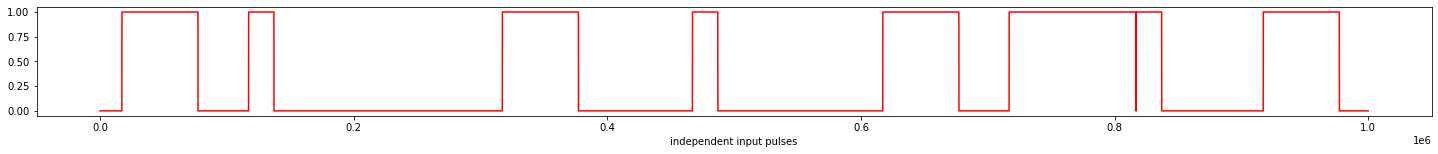

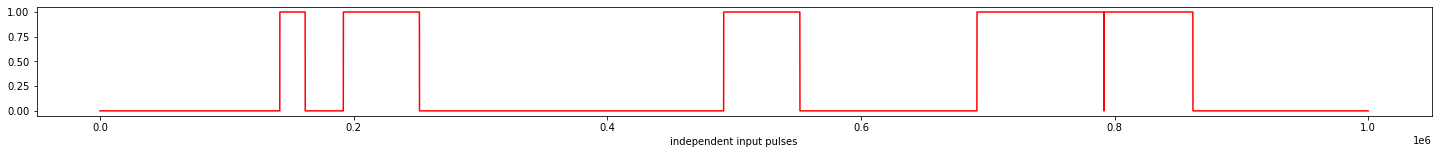

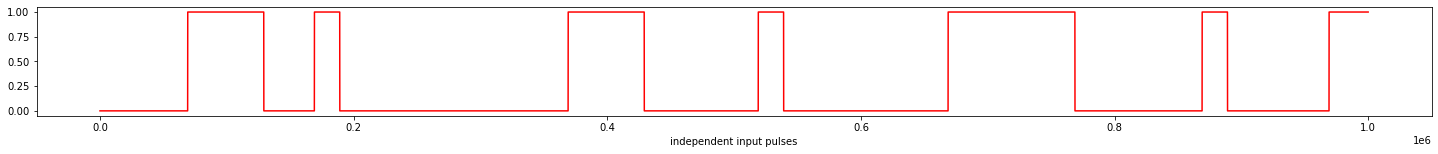

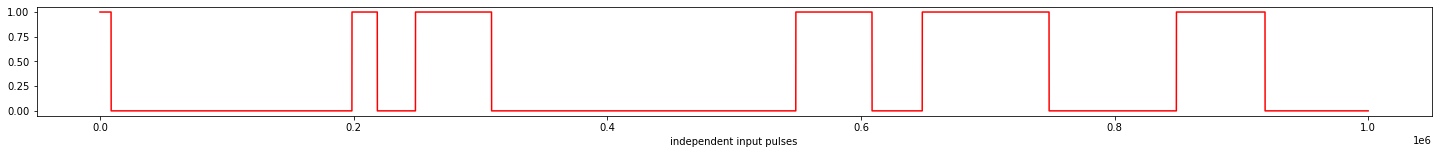

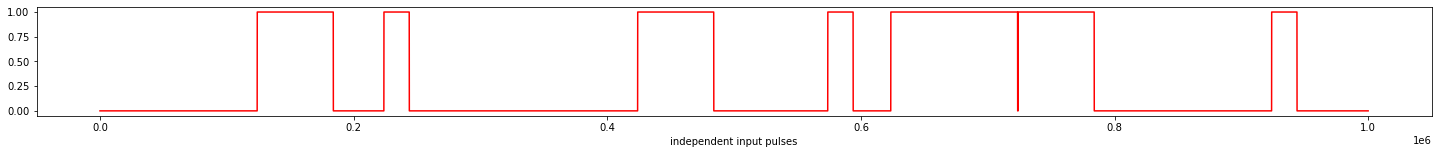

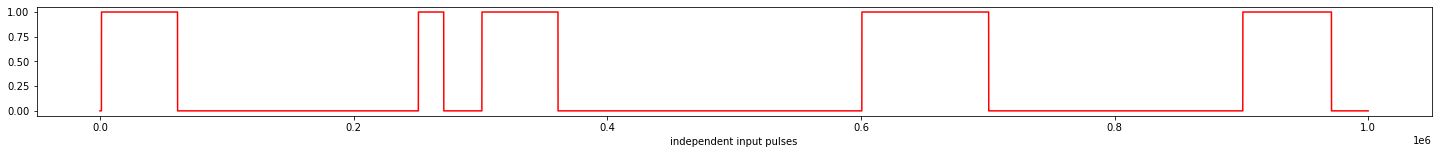

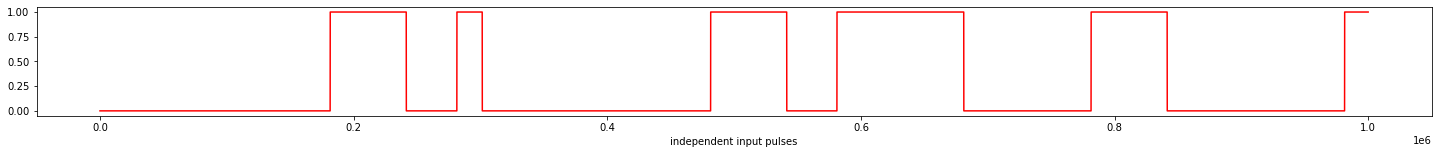

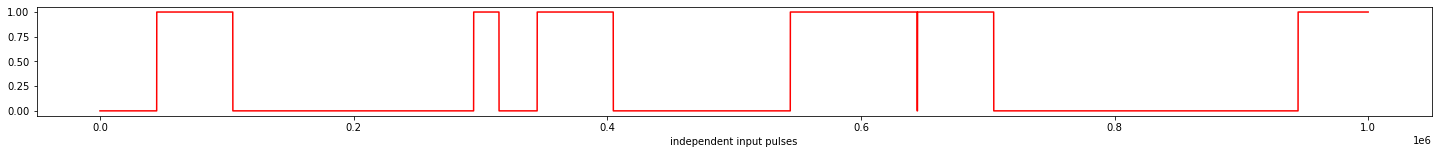

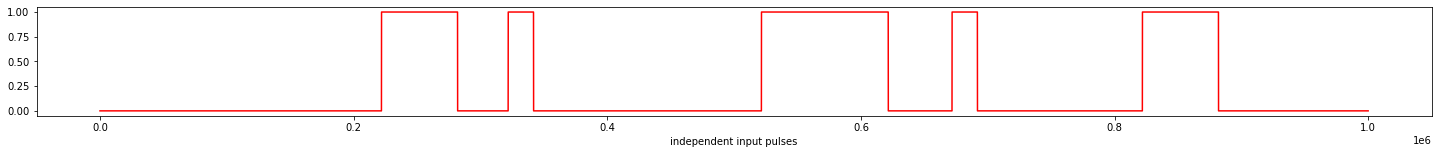

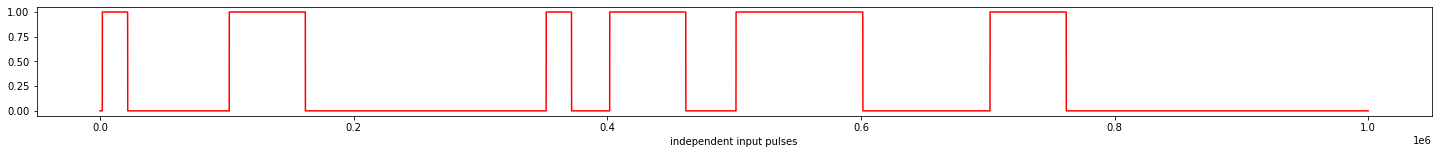

In [10]:
for i in range(len(output_buffer)-lim):
    plt.figure(figsize=(fig_x , fig_y))
    plt.plot(time_l[ci:cf],list(output_buffer[i])[ci:cf], color=clrs[0])
    plt.xlabel("independent input pulses")
    # plt.ylim([0, ylim])
    # plt.savefig("independent"+str(jdx)+".jpg")
    plt.show()

In [11]:
del input_buffer
for i in (output_buffer):
    del i